In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
notation=pd.read_excel('notationranking.xlsx')

In [44]:
notation

,Team,country_name_fr,Trigramme,Group,Host,Winner,Year,drapeau,point_avant,point_modif,pourcentage_victoire,classement,but_mis,but_enc,note,Rang
0,Uruguay,Uruguay,URU,3,1,1.0,1930,NaN,NaN,NaN,25.00,NaN,1.0,1.4,1.0,NaN
1,Argentina,Argentine,ARG,1,0,0.0,1930,NaN,NaN,NaN,55.56,NaN,1.9,0.7,0.8,NaN
2,United States,États-Unis,USA,4,0,0.0,1930,NaN,NaN,NaN,0.00,NaN,3.0,4.0,0.0,NaN
3,Yugoslavia,Yougoslavie,SRB,2,0,0.0,1930,NaN,NaN,NaN,41.67,NaN,2.4,2.1,0.6,NaN
4,Chile,Chili,CHI,1,0,0.0,1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Saudi Arabia,Arabie saoudite,KSA,C,0,NaN,2022,https://cloudinary.fifa.com/api/v1/picture/fla...,1444.69,1433.95,60.00,49.0,1.4,0.6,NaN,51.0
485,Ghana,Ghana,GHA,H,0,NaN,2022,https://cloudinary.fifa.com/api/v1/picture/fla...,1387.36,1381.45,30.00,60.0,1.0,1.0,NaN,61.0
486,Wales,Pays de Galles,WAL,B,0,NaN,2022,https://cloudinary.fifa.com/api/v1/picture/fla...,1588.08,1578.01,34.78,18.0,1.2,1.2,NaN,19.0
487,Costa Rica,Costa Rica,CRC,E,0,NaN,2022,https://cloudinary.fifa.com/api/v1/picture/fla...,1503.09,1464.06,44.44,31.0,0.9,0.8,NaN,31.0


In [45]:
notation=notation[['Host','pourcentage_victoire','but_mis','but_enc','note','Rang']]

In [46]:
notation.dropna(axis=0,inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_19724\3089430573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notation.dropna(axis=0,inplace=True)


In [47]:
notation['note'].replace([1,0.8,0.6,0.4,0.2],([5,4,3,2,1]),inplace=True)


C:\Users\chris\AppData\Local\Temp\ipykernel_19724\1571257271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notation['note'].replace([1,0.8,0.6,0.4,0.2],([5,4,3,2,1]),inplace=True)


In [49]:
#notation['Trigramme'].replace(['ALG','ANG','ARG','AUS','AUT','BEL','BIH','BOL','BRA','BUL','CHI','CHN','CIV','CMR','COL','CRC','CRO','CZE','DEN','ECU','EGY','ENG','ESP','FRA','GER','GHA','GRE','HON','IRL','IRN','ISL','ITA','JAM','JPN','KOR','KSA','MAR','MEX','NED','NGA','NOR','NZL','PAN','PAR','PER','POL','POR','ROU','RSA','RUS','SCO','SEN','SRB','SUI','SVK','SVN','SWE','TOG','TRI','TUN','TUR','UKR','URU','USA','WAL','HUN','CUB','IDN','NIR','PRK','ISR','SLV','HAI','KUW','IRQ','CAN','UAE'],range(77),inplace=True)


In [50]:
Y=notation['note']
X=notation[['Host','pourcentage_victoire','but_mis','but_enc','Rang']]
#X=notation.drop('note',axis=1)

In [51]:
Y

241    5.0
242    4.0
243    3.0
244    3.0
245    2.0
      ... 
452    1.0
453    2.0
454    1.0
455    0.0
456    2.0
Name: note, Length: 214, dtype: float64

In [70]:
#plt.scatter(X.iloc[:,0],Y,label='Y')

# Pourcentage de victoire

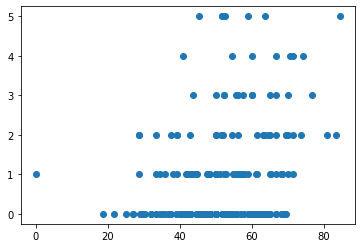

In [53]:
plt.scatter(X.iloc[:,1],Y,label='Y')

# But mis

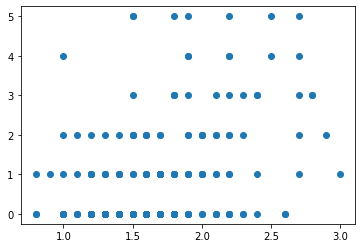

In [54]:
plt.scatter(X.iloc[:,2],Y,label='Y')

# But encaissés

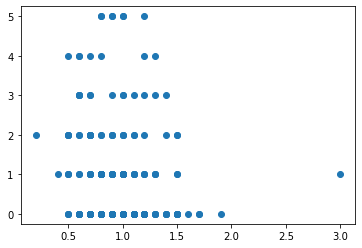

In [71]:
plt.scatter(X.iloc[:,3],Y,label='Y')

# Classement FIFA

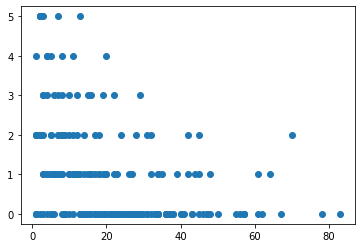

In [55]:
plt.scatter(X.iloc[:,4],Y,label='Y')

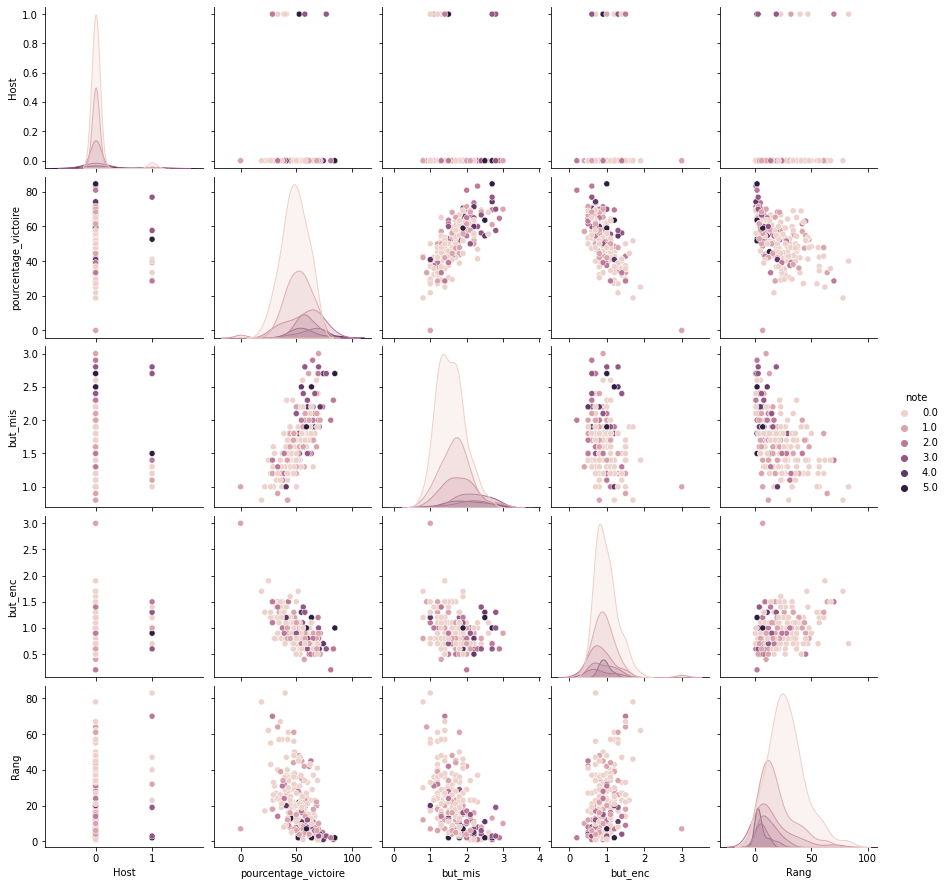

In [56]:
sns.pairplot(notation,hue='note')

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [59]:
X_train.shape

(171, 5)

In [60]:
Y_train.value_counts()

0.0    88
1.0    41
2.0    17
3.0    13
5.0     6
4.0     6
Name: note, dtype: int64

In [61]:
#Y_train=Y_train.T

In [62]:
#model=KNeighborsClassifier()
#model.fit(X_train,Y_train)
#model.score(X_test,Y_test)

0.4418604651162791

In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [65]:
#inititalisation des modeles
model_1=SGDClassifier(random_state=0)
model_2=DecisionTreeClassifier(random_state=0)
model_3=KNeighborsClassifier(n_neighbors=3)

model_4=VotingClassifier([('SGD',model_1),
                          ('Tree',model_2),
                         ('KNN',model_3)],
                        voting='hard')

#Entraine le model et affiche son nom
for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,Y_train)
    print(model.__class__.__name__,model.score(X_test,Y_test))

SGDClassifier 0.3953488372093023
DecisionTreeClassifier 0.37209302325581395
KNeighborsClassifier 0.4418604651162791
VotingClassifier 0.5116279069767442


In [66]:
model_5=StackingClassifier([('SGD',model_1),
                          ('Tree',model_2),
                         ('KNN',model_3)],
                        final_estimator=KNeighborsClassifier(n_neighbors=3))

model_5.fit(X_train,Y_train)
model_5.score(X_test,Y_test)

0.4883720930232558

In [67]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [68]:
def evaluation(model):
    
    model.fit(X_train, Y_train)
    Ypred = model.predict(X_test)
    
    print(confusion_matrix(Y_test, Ypred))
    print(classification_report(Y_test, Ypred))
    
    
    N , train_score, val_score =learning_curve(model, X_train, Y_train,
                                              cv = 4,scoring='f1',
                                              train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[19  3  0  0  0  0]
 [ 6  0  1  2  0  0]
 [ 5  2  3  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.63      0.86      0.73        22
         1.0       0.00      0.00      0.00         9
         2.0       0.75      0.30      0.43        10
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1

    accuracy                           0.51        43
   macro avg       0.23      0.19      0.19        43
weighted avg       0.50      0.51      0.47        43



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  

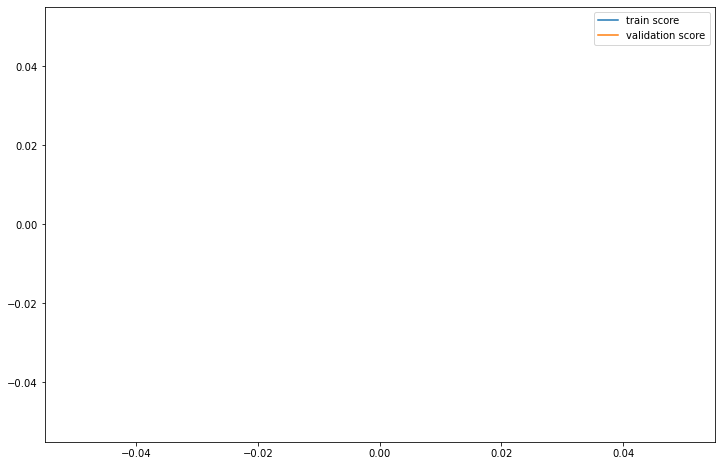

In [69]:
evaluation(model_4)

In [29]:
Y_test.value_counts()

0.0    22
2.0    10
1.0     9
4.0     1
5.0     1
Name: note, dtype: int64

In [30]:
Y_test.shape

(43,)

# Deuxieme partie du Machine Learning - Réduire le nombre de catégories

In [73]:
notationpoule=pd.read_excel('notationranking.xlsx')

In [74]:
notationpoule=notationpoule[['Trigramme','Host','pourcentage_victoire','but_mis','but_enc','note','Rang']]

In [75]:
notationpoule.dropna(axis=0,inplace=True)

In [76]:
notationpoule['note'].replace([1,0.8,0.6,0.4,0.2],([1,1,1,1,1]),inplace=True)

In [77]:
notationpoule

,Trigramme,Host,pourcentage_victoire,but_mis,but_enc,note,Rang
241,BRA,0,51.85,2.2,0.8,1.0,3.0
242,ITA,0,70.59,1.9,0.6,1.0,4.0
243,SWE,0,52.38,1.8,1.0,1.0,10.0
244,BUL,0,43.75,1.8,1.2,1.0,29.0
245,GER,0,71.43,2.2,0.9,1.0,1.0
...,...,...,...,...,...,...,...
452,ESP,0,70.00,3.0,0.9,1.0,10.0
453,SWE,0,39.13,1.5,0.9,1.0,24.0
454,SUI,0,68.42,2.1,0.6,1.0,6.0
455,TUN,0,36.84,1.3,1.2,0.0,21.0


In [78]:
Y=notationpoule['note']
X=notationpoule[['Host','pourcentage_victoire','but_mis','but_enc','Rang']]


In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [80]:
Y_test.value_counts()

0.0    22
1.0    21
Name: note, dtype: int64

In [38]:
model_1=SGDClassifier(random_state=0)
model_2=DecisionTreeClassifier(random_state=0)
model_3=KNeighborsClassifier(n_neighbors=3)

model_4=VotingClassifier([('SGD',model_1),
                          ('Tree',model_2),
                         ('KNN',model_3)],
                        voting='hard')

#Entraine le model et affiche son nom
for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,Y_train)
    print(model.__class__.__name__,model.score(X_test,Y_test))

SGDClassifier 0.627906976744186
DecisionTreeClassifier 0.5348837209302325
KNeighborsClassifier 0.6046511627906976
VotingClassifier 0.5581395348837209


In [39]:
model_5=StackingClassifier([('SGD',model_1),
                          ('Tree',model_2),
                         ('KNN',model_3)],
                        final_estimator=KNeighborsClassifier(n_neighbors=3))

model_5.fit(X_train,Y_train)
model_5.score(X_test,Y_test)

0.5581395348837209

[[13  9]
 [ 7 14]]
              precision    recall  f1-score   support

         0.0       0.65      0.59      0.62        22
         1.0       0.61      0.67      0.64        21

    accuracy                           0.63        43
   macro avg       0.63      0.63      0.63        43
weighted avg       0.63      0.63      0.63        43



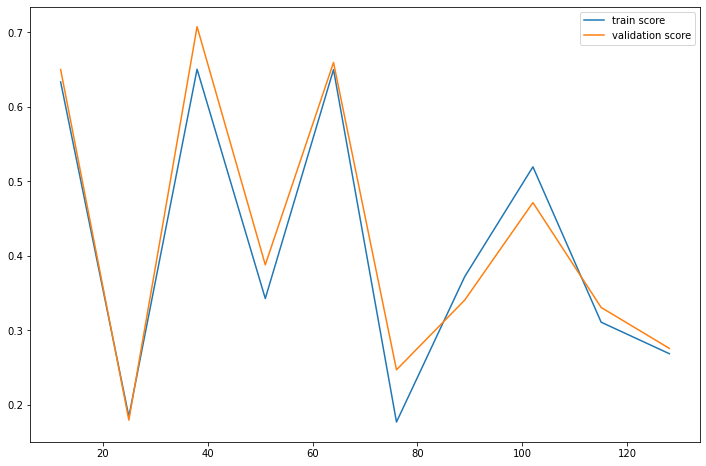

In [40]:
evaluation(model_1)

In [123]:
X

,Host,pourcentage_victoire,but_mis,but_enc,Rang
241,0,51.85,2.2,0.8,3.0
242,0,70.59,1.9,0.6,4.0
243,0,52.38,1.8,1.0,10.0
244,0,43.75,1.8,1.2,29.0
245,0,71.43,2.2,0.9,1.0
...,...,...,...,...,...
452,0,70.00,3.0,0.9,10.0
453,0,39.13,1.5,0.9,24.0
454,0,68.42,2.1,0.6,6.0
455,0,36.84,1.3,1.2,21.0


# Seulement le classement FIFIA

In [150]:
notationrang=pd.read_excel('notationranking.xlsx')

In [151]:
notationrang=notationrang[['Host','note','Rang']]
notationrang['Rang']=(1.)/(notationrang['Rang'])

In [152]:
notationrang.dropna(axis=0,inplace=True)

In [153]:
notationrang['note'].replace([1,0.8,0.6,0.4,0.2],([1,1,1,1,1]),inplace=True)

In [154]:
Y=notationrang['note']
X=notationrang[['Host','Rang']]

In [157]:
X

,Host,Rang
241,0,0.333333
242,0,0.250000
243,0,0.100000
244,0,0.034483
245,0,1.000000
...,...,...
452,0,0.100000
453,0,0.041667
454,0,0.166667
455,0,0.047619


In [155]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [158]:
model_1=SGDClassifier(random_state=0)
model_2=DecisionTreeClassifier(random_state=0)
model_3=KNeighborsClassifier(n_neighbors=3)

model_4=VotingClassifier([('SGD',model_1),
                          ('Tree',model_2),
                         ('KNN',model_3)],
                        voting='hard')

#Entraine le model et affiche son nom
for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,Y_train)
    print(model.__class__.__name__,model.score(X_test,Y_test))

SGDClassifier 0.5348837209302325
DecisionTreeClassifier 0.4883720930232558
KNeighborsClassifier 0.5581395348837209
VotingClassifier 0.5581395348837209
